In [1]:
# install pymongo if not installed

#! pip install pymongo==3.11.3

In [33]:
from pymongo import MongoClient
import pandas as pd

# connect to local mongodb and database test
 
MONGO_HOST= 'mongodb://localhost:27017/test'

client = MongoClient(MONGO_HOST)

# select database
db=client['test']

#select the collection within the database
collection = db.healthImpact

In [2]:
# disply first document in the collection
result=collection.find()
result[0]

{'_id': ObjectId('6217cd460af6ac5787de0048'),
 'created_at': 'Thu Feb 24 18:24:01 +0000 2022',
 'id': 1496913822854140000,
 'id_str': '1496913822854139908',
 'text': 'RT @DrBrendaMTR: Love this! Sleep is vital for optimal for human health … human health and environmental health are interconnected, sleep m…',
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 115105845,
  'id_str': '115105845',
  'name': 'Liz Borkowski',
  'screen_name': 'LizBorkowski',
  'location': 'DC',
  'url': 'http://www.thepumphandle.org/',
  'description': "Public health researcher at George Washington University, managing editor of Women's Health Issues. She/her, views are my own.",
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_

In [34]:
# create a pipeline to extract certain fields

pipeline =[
   {"$project": {
   "tweet_id": "$id_str",
    "created_at":1,
    "user_name":"$user.name",
    "user_screenName": "$user.screen_name",
    "text":1,
    "source":1,
    "place":1,
     "lang":1,
     "_id":0
  }
  }
]

result=collection.aggregate(pipeline)

result_list=[]  # create an array to store the result

for res in result:
    #print(res)
    result_list.append(res)
    
result_list

# convert result list into pandas data frame

result_pd = pd.DataFrame(list(result_list))

result_pd.head()

,created_at,text,source,lang,tweet_id,user_name,user_screenName,place
0,Thu Feb 24 18:24:01 +0000 2022,"RT @DrBrendaMTR: Love this! Sleep is vital for optimal for human health … human health and environmental health are interconnected, sleep m…","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1496913822854139908,Liz Borkowski,LizBorkowski,NaN
1,Mon Feb 28 10:03:27 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498237401554108416,Joseph Macharia Kimemia,J_YouthAdvocate,NaN
2,Mon Feb 28 10:01:17 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498236858060398592,Faith Nabwire,FaithNabwire12,NaN
3,Sun Feb 27 13:58:58 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1497934285071732737,Sue Cooke,SMC54,NaN
4,Sun Feb 27 09:15:19 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""https://Eco1stArt.com"" rel=""nofollow"">Eco Promotions</a>",en,1497862903860539394,Andrea,Eco1stArt,NaN


## Sentiment Analysis

In this next block of code we will cycle through all the tweets and score the tweet text using the VADER Sentiment library. See: https://pypi.org/project/vaderSentiment/

In [ ]:
#! pip install vaderSentiment==3.3.2

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = []
analyzer = SentimentIntensityAnalyzer()

for index, row in result_pd.iterrows():
    tweet = str(row['text'])
    vs = analyzer.polarity_scores(tweet)
    sentiment.append(vs)
    
result_pd['VaderSentiment'] = sentiment

In [36]:
result_pd.head()

,created_at,text,source,lang,tweet_id,user_name,user_screenName,place,VaderSentiment
0,Thu Feb 24 18:24:01 +0000 2022,"RT @DrBrendaMTR: Love this! Sleep is vital for optimal for human health … human health and environmental health are interconnected, sleep m…","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1496913822854139908,Liz Borkowski,LizBorkowski,NaN,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.8478}"
1,Mon Feb 28 10:03:27 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498237401554108416,Joseph Macharia Kimemia,J_YouthAdvocate,NaN,"{'neg': 0.116, 'neu': 0.759, 'pos': 0.125, 'compound': 0.0516}"
2,Mon Feb 28 10:01:17 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498236858060398592,Faith Nabwire,FaithNabwire12,NaN,"{'neg': 0.116, 'neu': 0.759, 'pos': 0.125, 'compound': 0.0516}"
3,Sun Feb 27 13:58:58 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1497934285071732737,Sue Cooke,SMC54,NaN,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}"
4,Sun Feb 27 09:15:19 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""https://Eco1stArt.com"" rel=""nofollow"">Eco Promotions</a>",en,1497862903860539394,Andrea,Eco1stArt,NaN,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}"


In [7]:
# Now let's change the setting so a print will show all of the columns, change the column max width so we can see the whole
# tweet, and show up to 100 rows
pd.set_option('display.max_columns', None) # This will make it so all columns appear when printing
pd.options.display.max_colwidth = 300  # This makes it so we can see the entire tweet text.
pd.set_option('display.max_rows', 10)

In [6]:
result_pd.head()

,created_at,text,source,lang,tweet_id,user_name,user_screenName,place,VaderSentiment
0,Thu Feb 24 18:24:01 +0000 2022,"RT @DrBrendaMTR: Love this! Sleep is vital for optimal for human health … human health and environmental health are interconnected, sleep m…","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1496913822854139908,Liz Borkowski,LizBorkowski,NaN,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.8478}"
1,Mon Feb 28 10:03:27 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498237401554108416,Joseph Macharia Kimemia,J_YouthAdvocate,NaN,"{'neg': 0.116, 'neu': 0.759, 'pos': 0.125, 'compound': 0.0516}"
2,Mon Feb 28 10:01:17 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498236858060398592,Faith Nabwire,FaithNabwire12,NaN,"{'neg': 0.116, 'neu': 0.759, 'pos': 0.125, 'compound': 0.0516}"
3,Sun Feb 27 13:58:58 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1497934285071732737,Sue Cooke,SMC54,NaN,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}"
4,Sun Feb 27 09:15:19 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""https://Eco1stArt.com"" rel=""nofollow"">Eco Promotions</a>",en,1497862903860539394,Andrea,Eco1stArt,NaN,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}"


In [37]:
# extract compound value for the VaderSentiment

result_pd['compound']=result_pd['VaderSentiment'].apply(pd.Series)['compound']

result_pd.head()

,created_at,text,source,lang,tweet_id,user_name,user_screenName,place,VaderSentiment,compound
0,Thu Feb 24 18:24:01 +0000 2022,"RT @DrBrendaMTR: Love this! Sleep is vital for optimal for human health … human health and environmental health are interconnected, sleep m…","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1496913822854139908,Liz Borkowski,LizBorkowski,NaN,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.8478}",0.8478
1,Mon Feb 28 10:03:27 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498237401554108416,Joseph Macharia Kimemia,J_YouthAdvocate,NaN,"{'neg': 0.116, 'neu': 0.759, 'pos': 0.125, 'compound': 0.0516}",0.0516
2,Mon Feb 28 10:01:17 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498236858060398592,Faith Nabwire,FaithNabwire12,NaN,"{'neg': 0.116, 'neu': 0.759, 'pos': 0.125, 'compound': 0.0516}",0.0516
3,Sun Feb 27 13:58:58 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1497934285071732737,Sue Cooke,SMC54,NaN,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}",0.3818
4,Sun Feb 27 09:15:19 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""https://Eco1stArt.com"" rel=""nofollow"">Eco Promotions</a>",en,1497862903860539394,Andrea,Eco1stArt,NaN,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}",0.3818


In [9]:
result_pd['compound'].mean()

-0.08362649572649702

In [10]:
result_pd['compound'].describe()

count    5967.000000
mean       -0.083626
std         0.462512
min        -0.921700
25%        -0.526700
50%         0.000000
75%         0.361200
max         0.924600
Name: compound, dtype: float64

In [11]:
result_pd.dtypes

created_at          object
text                object
source              object
lang                object
tweet_id            object
user_name           object
user_screenName     object
place               object
VaderSentiment      object
compound           float64
dtype: object

In [38]:
def sent_classify(score):
    if score>0:
        return "Positive"
    elif score<0:
        return "Negative"
    else:
        return "Neutral"

result_pd['sentiment']=result_pd['compound'].apply(sent_classify)

In [39]:
result_sent=result_pd.groupby('sentiment')['sentiment'].count()

In [14]:
result_sent.head()

sentiment
Negative    2790
Neutral      831
Positive    2346
Name: sentiment, dtype: int64

In [40]:
result_sent2=result_sent.rename("totalTweets").reset_index()

result_sent2.head()

,sentiment,totalTweets
0,Negative,2790
1,Neutral,831
2,Positive,2346


<AxesSubplot:xlabel='sentiment', ylabel='totalTweets'>

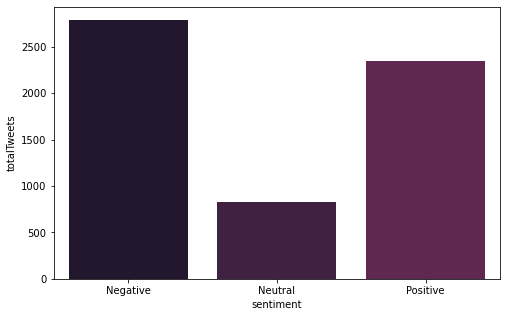

In [16]:
# visualize the result

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the figure size
plt.figure(figsize=(8,5))

# use a sequential color with 10 variations
palette=sns.color_palette("rocket", 10)

# plot a bar chart
sns.barplot(
    x="sentiment", 
    y="totalTweets", 
    data=result_sent2, 
    palette=palette)

In [42]:
result_pd.head()

,created_at,text,source,lang,tweet_id,user_name,user_screenName,place,VaderSentiment,compound,sentiment
0,Thu Feb 24 18:24:01 +0000 2022,"RT @DrBrendaMTR: Love this! Sleep is vital for optimal for human health … human health and environmental health are interconnected, sleep m…","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1496913822854139908,Liz Borkowski,LizBorkowski,NaN,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.8478}",0.8478,Positive
1,Mon Feb 28 10:03:27 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498237401554108416,Joseph Macharia Kimemia,J_YouthAdvocate,NaN,"{'neg': 0.116, 'neu': 0.759, 'pos': 0.125, 'compound': 0.0516}",0.0516,Positive
2,Mon Feb 28 10:01:17 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498236858060398592,Faith Nabwire,FaithNabwire12,NaN,"{'neg': 0.116, 'neu': 0.759, 'pos': 0.125, 'compound': 0.0516}",0.0516,Positive
3,Sun Feb 27 13:58:58 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1497934285071732737,Sue Cooke,SMC54,NaN,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}",0.3818,Positive
4,Sun Feb 27 09:15:19 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""https://Eco1stArt.com"" rel=""nofollow"">Eco Promotions</a>",en,1497862903860539394,Andrea,Eco1stArt,NaN,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}",0.3818,Positive


# Gender Guesser

In this section we will guess a persons gender based off of their first name. We split the name using the first space found into a first and last name.

In [58]:
# You only need to run this once then comment out the code.
!pip install gender_guesser

In [43]:
# This splits the name field into two different fields and saves it in a new dataframe
names = result_pd["user_name"].str.split(" ", n = 1, expand = True)
names.head(10)

,0,1
0,Liz,Borkowski
1,Joseph,Macharia Kimemia
2,Faith,Nabwire
3,Sue,Cooke
4,Andrea,None
5,Treza,Gift
6,TheGuruWeb,None
7,Menstrual,Daddy ( alfredabuka9@gmail.com)
8,TheGuruWeb,None
9,carol_mwangi,None


In [44]:
# This creates a new field in the original dataframe using the first column in the names dataframe
result_pd['First'] = names[0]

result_pd.head()

,created_at,text,source,lang,tweet_id,user_name,user_screenName,place,VaderSentiment,compound,sentiment,First
0,Thu Feb 24 18:24:01 +0000 2022,"RT @DrBrendaMTR: Love this! Sleep is vital for optimal for human health … human health and environmental health are interconnected, sleep m…","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1496913822854139908,Liz Borkowski,LizBorkowski,NaN,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.8478}",0.8478,Positive,Liz
1,Mon Feb 28 10:03:27 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498237401554108416,Joseph Macharia Kimemia,J_YouthAdvocate,NaN,"{'neg': 0.116, 'neu': 0.759, 'pos': 0.125, 'compound': 0.0516}",0.0516,Positive,Joseph
2,Mon Feb 28 10:01:17 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498236858060398592,Faith Nabwire,FaithNabwire12,NaN,"{'neg': 0.116, 'neu': 0.759, 'pos': 0.125, 'compound': 0.0516}",0.0516,Positive,Faith
3,Sun Feb 27 13:58:58 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1497934285071732737,Sue Cooke,SMC54,NaN,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}",0.3818,Positive,Sue
4,Sun Feb 27 09:15:19 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""https://Eco1stArt.com"" rel=""nofollow"">Eco Promotions</a>",en,1497862903860539394,Andrea,Eco1stArt,NaN,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}",0.3818,Positive,Andrea


In [45]:
import gender_guesser.detector as gender

d = gender.Detector()

In [27]:
# DONT RUN THIS WITH YOUR FULL DATA!!! THIS IS FOR DEMO PURPOSES ONLY AND DOES NOT HAVE TO BE RUN
# Here we are looping through all the records and displaying the first name along with the "guessed" gender
for index, row in result_pd[0:10].iterrows():
    print(row['First'], d.get_gender(row['First']))

Liz female
Joseph male
Faith female
Sue female
Andrea female
Treza unknown
TheGuruWeb unknown
Menstrual unknown
TheGuruWeb unknown
carol_mwangi unknown


In [46]:
# Let's rerun it and save the guessed gender back to the dataframe
genderguess = []

for index, row in result_pd.iterrows():
    genderguess.append(d.get_gender(row['First']))
    
result_pd['gender'] = genderguess

result_pd.head()

,created_at,text,source,lang,tweet_id,user_name,user_screenName,place,VaderSentiment,compound,sentiment,First,gender
0,Thu Feb 24 18:24:01 +0000 2022,"RT @DrBrendaMTR: Love this! Sleep is vital for optimal for human health … human health and environmental health are interconnected, sleep m…","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1496913822854139908,Liz Borkowski,LizBorkowski,NaN,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.8478}",0.8478,Positive,Liz,female
1,Mon Feb 28 10:03:27 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498237401554108416,Joseph Macharia Kimemia,J_YouthAdvocate,NaN,"{'neg': 0.116, 'neu': 0.759, 'pos': 0.125, 'compound': 0.0516}",0.0516,Positive,Joseph,male
2,Mon Feb 28 10:01:17 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498236858060398592,Faith Nabwire,FaithNabwire12,NaN,"{'neg': 0.116, 'neu': 0.759, 'pos': 0.125, 'compound': 0.0516}",0.0516,Positive,Faith,female
3,Sun Feb 27 13:58:58 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1497934285071732737,Sue Cooke,SMC54,NaN,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}",0.3818,Positive,Sue,female
4,Sun Feb 27 09:15:19 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""https://Eco1stArt.com"" rel=""nofollow"">Eco Promotions</a>",en,1497862903860539394,Andrea,Eco1stArt,NaN,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}",0.3818,Positive,Andrea,female


<AxesSubplot:xlabel='gender', ylabel='compound'>

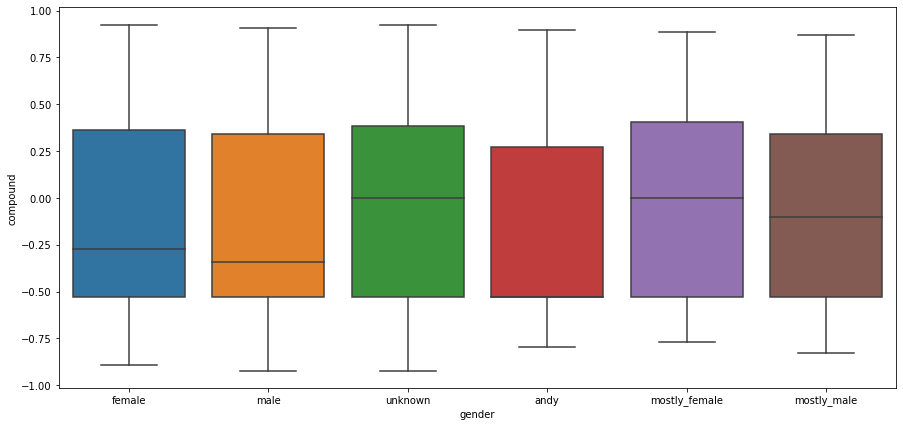

In [47]:
# let see whether sentiment differs by gender

# Set the figure size
plt.figure(figsize=(15, 7))


sns.boxplot(x='gender', y='compound', data=result_pd)

In [48]:
# save the result in a csv file at current directoy

result_pd.to_csv("healthImpact.csv", sep="|", index=False)

In [50]:
df=pd.read_csv("healthImpact.csv", sep="|")

In [51]:
df.head()

,created_at,text,source,lang,tweet_id,user_name,user_screenName,place,VaderSentiment,compound,sentiment,First,gender
0,Thu Feb 24 18:24:01 +0000 2022,"RT @DrBrendaMTR: Love this! Sleep is vital for optimal for human health … human health and environmental health are interconnected, sleep m…","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1496913822854139908,Liz Borkowski,LizBorkowski,NaN,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.8478}",0.8478,Positive,Liz,female
1,Mon Feb 28 10:03:27 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498237401554108416,Joseph Macharia Kimemia,J_YouthAdvocate,NaN,"{'neg': 0.116, 'neu': 0.759, 'pos': 0.125, 'compound': 0.0516}",0.0516,Positive,Joseph,male
2,Mon Feb 28 10:01:17 +0000 2022,"RT @J_YouthAdvocate: Plastics threatens ocean health, the health of marine species, food safety and quality, human health, coastal tourism,…","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,1498236858060398592,Faith Nabwire,FaithNabwire12,NaN,"{'neg': 0.116, 'neu': 0.759, 'pos': 0.125, 'compound': 0.0516}",0.0516,Positive,Faith,female
3,Sun Feb 27 13:58:58 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,1497934285071732737,Sue Cooke,SMC54,NaN,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}",0.3818,Positive,Sue,female
4,Sun Feb 27 09:15:19 +0000 2022,RT @thewyliekate1: Climate change is a health issue. Health professionals need to advocate for climate action to protect human health. By j…,"<a href=""https://Eco1stArt.com"" rel=""nofollow"">Eco Promotions</a>",en,1497862903860539394,Andrea,Eco1stArt,NaN,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}",0.3818,Positive,Andrea,female
